In [10]:
import numpy as np
import csv
import os
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
random.seed(42)
np.random.seed(42)

In [137]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statistics import mean
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier

# Dataset 1

In [2]:
file_path= os.path.expanduser('~/EE219/hw4/network_backup_dataset.csv')
df=pd.read_csv(file_path, sep=',',header='infer')

In [3]:
print("index by column names: one column\n", df.loc[0,'File Name'])

index by column names: one column
 File_0


In [6]:
def day_of_week_num(days):
    convert = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
    
    num = []
    for i in range(0, len(days)):
        num.append(convert[days[i]])
    return num

df['day_number'] = 7*(df['Week #'] - 1) + day_of_week_num(df['Day of Week'])

In [7]:
twenty_day_period = df[df['day_number'] <=20]  

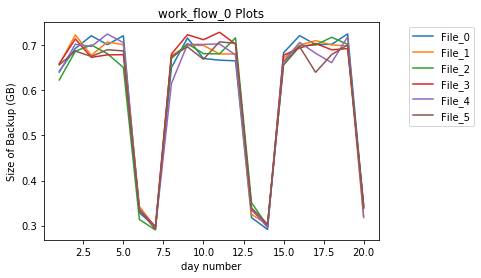

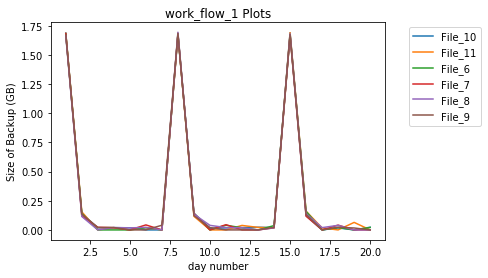

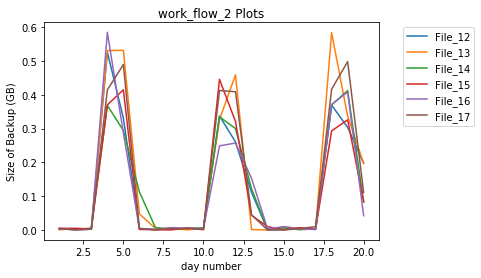

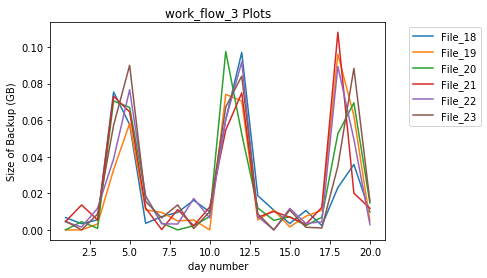

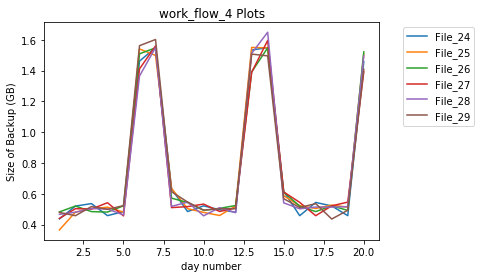

In [31]:
for wfID, wfGroup in twenty_day_period.groupby('Work-Flow-ID'):
    plt.figure()
    plt.title('%s Plots' % wfID)
    plt.xlabel('day number')
    plt.ylabel('Size of Backup (GB)')
    for fID, fGroup in wfGroup.groupby('File Name'):
        sum_one_day = fGroup.groupby('day_number').sum()
        plt.plot(range(1,21,1), sum_one_day['Size of Backup (GB)'], label=fID)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

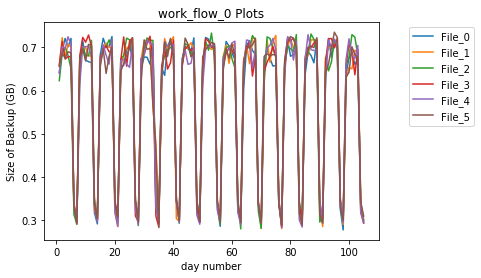

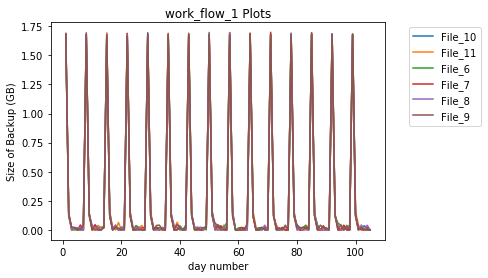

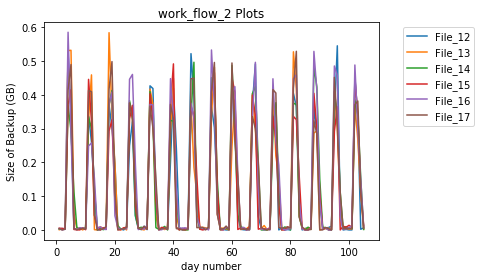

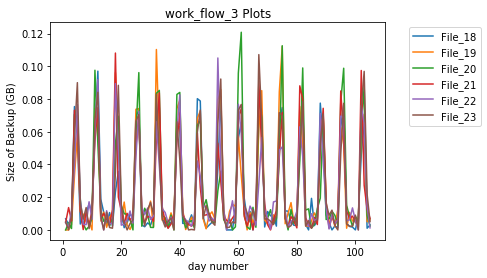

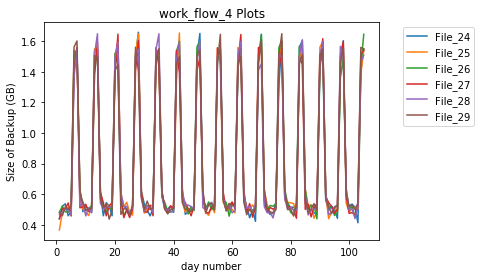

In [32]:
for wfID, wfGroup in df.groupby('Work-Flow-ID'):
    plt.figure()
    plt.title('%s Plots' % wfID)
    plt.xlabel('day number')
    plt.ylabel('Size of Backup (GB)')
    for fID, fGroup in wfGroup.groupby('File Name'):
        sum_one_day = fGroup.groupby('day_number').sum()
        plt.plot(range(1,106,1), sum_one_day['Size of Backup (GB)'], label=fID)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Section 2

In [96]:
df=pd.read_csv(file_path, sep=',',header='infer')
def trim_by_last_num(id):    
    num = []
    for i in range(0, len(id)):
        mystr=id[i]
        myst=mystr[-2:]
        if myst[0]=='_':
            myst=mystr[-1:]
        num.append(myst)
    return num
df['Day of Week'] = 7*(df['Week #'] - 1) + day_of_week_num(df['Day of Week'])
df['Work-Flow-ID'] = trim_by_last_num(df['Work-Flow-ID'])
df['File Name'] = trim_by_last_num(df['File Name'])
df_y=df['Size of Backup (GB)']
df=df.drop(['Size of Backup (GB)','Backup Time (hour)'], axis = 1)

# Linear Regression model

In [109]:
kf = KFold(n_splits=10,random_state=42,shuffle=True)
RMSE_train=[]
RMSE_test=[]
for train_index, test_index in kf.split(df):
    X_train= df.loc[train_index]
    y_train= df_y.loc[train_index]
    X_test= df.loc[test_index]
    y_test= df_y.loc[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    pred_train = reg.predict(X_train)
    pred_test = reg.predict(X_test)
    RMSE_train.append(mean_squared_error(y_train, pred_train))
    RMSE_test.append(mean_squared_error(y_test, pred_test))
print('RMSE for train data=',mean(RMSE_train))
print('RMSE for test data=',mean(RMSE_test))

RMSE for train data= 0.010730364097578174
RMSE for test data= 0.010740225405876958


Text(0, 0.5, 'fitted valuse')

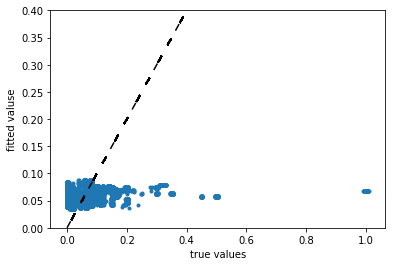

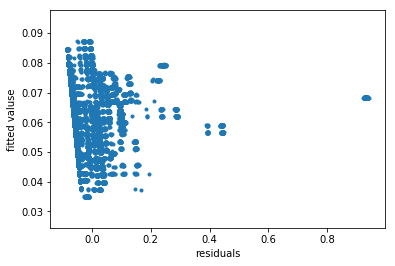

In [135]:
reg = LinearRegression().fit(df, df_y)
pred= reg.predict(df)
plt.figure()
plt.scatter(df_y, pred,marker='.')
plt.plot(df_y,df_y,dashes=[5, 25],color='black')
plt.xlabel('true values')
plt.ylabel('fitted valuse')
plt.ylim(0, 0.4) 

plt.figure()
plt.scatter(df_y-pred, pred,marker='.')
plt.xlabel('residuals')
plt.ylabel('fitted valuse')

# Random Forest 

In [140]:
RMSE_train=[]
RMSE_test=[]
oob_error=[]
for train_index, test_index in kf.split(df):
    X_train= df.loc[train_index]
    y_train= df_y.loc[train_index]
    X_test= df.loc[test_index]
    y_test= df_y.loc[test_index]
    reg = RandomForestRegressor(oob_score=True,n_estimators=20,max_depth=4, bootstrap=True,max_features=5,random_state=42)
    reg.fit(X_train,y_train)
    pred_train = reg.predict(X_train)
    pred_test = reg.predict(X_test)
    oob_error.append(1 - reg.oob_score_)
    RMSE_train.append(mean_squared_error(y_train, pred_train))
    RMSE_test.append(mean_squared_error(y_test, pred_test))
print('oob=',mean(oob_error))
print('RMSE for train data=',mean(RMSE_train))
print('RMSE for test data=',mean(RMSE_test))

F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

oob= 0.6964355343194398
RMSE for train data= 0.0074867977811667805
RMSE for test data= 0.007541894062431588


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [149]:
avg_RMSE=np.zeros((200,5,2))
oob=np.zeros((200,5))
for tree_num in range(1,201):
    for feature_num in range(1,6):
        RMSE_train=[]
        RMSE_test=[]
        oob_error=[]
        for train_index, test_index in kf.split(df):
            X_train= df.loc[train_index]
            y_train= df_y.loc[train_index]
            X_test= df.loc[test_index]
            y_test= df_y.loc[test_index]
            reg = RandomForestRegressor(oob_score=True,n_estimators=tree_num,max_depth=4, bootstrap=True,max_features=feature_num,random_state=42)
            reg.fit(X_train,y_train)
            pred_train = reg.predict(X_train)
            pred_test = reg.predict(X_test)
            oob_error.append(1 - reg.oob_score_)
            RMSE_train.append(mean_squared_error(y_train, pred_train))
            RMSE_test.append(mean_squared_error(y_test, pred_test))
        print('tree_num=',tree_num,'feature_num=',feature_num,'oob=',mean(oob_error))
        print('tree_num=',tree_num,'feature_num=',feature_num,'RMSE for test data=',mean(RMSE_train))
        print('tree_num=',tree_num,'feature_num=',feature_num,'RMSE for test data=',mean(RMSE_test))
        avg_RMSE[tree_num-1,feature_num-1,0]=mean(RMSE_train)
        avg_RMSE[tree_num-1,feature_num-1,1]=mean(RMSE_test)
        oob[tree_num-1,feature_num-1]=mean(oob_error)

F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 1 feature_num= 1 oob= 1.1330891134542076
tree_num= 1 feature_num= 1 RMSE for test data= 0.00838477598795009
tree_num= 1 feature_num= 1 RMSE for test data= 0.008385712655835442


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 1 feature_num= 2 oob= 1.1383966631058062
tree_num= 1 feature_num= 2 RMSE for test data= 0.008570804046630267
tree_num= 1 feature_num= 2 RMSE for test data= 0.008608031160887644


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 1 feature_num= 3 oob= 1.1098116278221857
tree_num= 1 feature_num= 3 RMSE for test data= 0.007714447952292053
tree_num= 1 feature_num= 3 RMSE for test data= 0.007768320559159055


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 1 feature_num= 4 oob= 1.1067844378319391
tree_num= 1 feature_num= 4 RMSE for test data= 0.007649344929982642
tree_num= 1 feature_num= 4 RMSE for test data= 0.007738559521342489


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 1 feature_num= 5 oob= 1.1046446871665803
tree_num= 1 feature_num= 5 RMSE for test data= 0.007601588033466969
tree_num= 1 feature_num= 5 RMSE for test data= 0.007694686867732958


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 2 feature_num= 1 oob= 1.0120445897934118
tree_num= 2 feature_num= 1 RMSE for test data= 0.00833563722544577
tree_num= 2 feature_num= 1 RMSE for test data= 0.008423372470581288


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 2 feature_num= 2 oob= 0.9871217312118356
tree_num= 2 feature_num= 2 RMSE for test data= 0.007863850986999625
tree_num= 2 feature_num= 2 RMSE for test data= 0.007895584616453977


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 2 feature_num= 3 oob= 0.9691803200624205
tree_num= 2 feature_num= 3 RMSE for test data= 0.007736883196988824
tree_num= 2 feature_num= 3 RMSE for test data= 0.00775006612684005


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 2 feature_num= 4 oob= 0.9560938915828749
tree_num= 2 feature_num= 4 RMSE for test data= 0.007576507478087089
tree_num= 2 feature_num= 4 RMSE for test data= 0.007653418413972446


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 2 feature_num= 5 oob= 0.954544890804969
tree_num= 2 feature_num= 5 RMSE for test data= 0.007565524162480558
tree_num= 2 feature_num= 5 RMSE for test data= 0.007646324453516249


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 3 feature_num= 1 oob= 0.9176052104825793
tree_num= 3 feature_num= 1 RMSE for test data= 0.008023764702771509
tree_num= 3 feature_num= 1 RMSE for test data= 0.008108865110601356


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 3 feature_num= 2 oob= 0.8904027585584027
tree_num= 3 feature_num= 2 RMSE for test data= 0.007741817526154904
tree_num= 3 feature_num= 2 RMSE for test data= 0.007776086687497403


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 3 feature_num= 3 oob= 0.8720865465653825
tree_num= 3 feature_num= 3 RMSE for test data= 0.007606035314434844
tree_num= 3 feature_num= 3 RMSE for test data= 0.007663796429443275


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 3 feature_num= 4 oob= 0.8609189582900902
tree_num= 3 feature_num= 4 RMSE for test data= 0.0075345878852339735
tree_num= 3 feature_num= 4 RMSE for test data= 0.007631318716243099


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 3 feature_num= 5 oob= 0.8603245980415845
tree_num= 3 feature_num= 5 RMSE for test data= 0.0075266649619027265
tree_num= 3 feature_num= 5 RMSE for test data= 0.007622121869623507


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 4 feature_num= 1 oob= 0.8816694617190244
tree_num= 4 feature_num= 1 RMSE for test data= 0.008194005767965258
tree_num= 4 feature_num= 1 RMSE for test data= 0.008268333753994115


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 4 feature_num= 2 oob= 0.8408095889982333
tree_num= 4 feature_num= 2 RMSE for test data= 0.007812553491616981
tree_num= 4 feature_num= 2 RMSE for test data= 0.007853651558941906


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 4 feature_num= 3 oob= 0.8188531668487766
tree_num= 4 feature_num= 3 RMSE for test data= 0.007651216787379807
tree_num= 4 feature_num= 3 RMSE for test data= 0.007699088147502647


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 4 feature_num= 4 oob= 0.8021987201275337
tree_num= 4 feature_num= 4 RMSE for test data= 0.0075296511792817015
tree_num= 4 feature_num= 4 RMSE for test data= 0.007610005911786218


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 4 feature_num= 5 oob= 0.8009944797445917
tree_num= 4 feature_num= 5 RMSE for test data= 0.007526370958571612
tree_num= 4 feature_num= 5 RMSE for test data= 0.0076066487044746285


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 5 feature_num= 1 oob= 0.8403167005752359
tree_num= 5 feature_num= 1 RMSE for test data= 0.00814199890214479
tree_num= 5 feature_num= 1 RMSE for test data= 0.008197188023777434


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 5 feature_num= 2 oob= 0.8063740663163709
tree_num= 5 feature_num= 2 RMSE for test data= 0.007848355138186502
tree_num= 5 feature_num= 2 RMSE for test data= 0.007878803035056536


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 5 feature_num= 3 oob= 0.7774416359758928
tree_num= 5 feature_num= 3 RMSE for test data= 0.007615058457267409
tree_num= 5 feature_num= 3 RMSE for test data= 0.007655344856472634


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 5 feature_num= 4 oob= 0.764126098389722
tree_num= 5 feature_num= 4 RMSE for test data= 0.007526943262944961
tree_num= 5 feature_num= 4 RMSE for test data= 0.00760011969973518


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 5 feature_num= 5 oob= 0.7631552774329542
tree_num= 5 feature_num= 5 RMSE for test data= 0.007524212504736801
tree_num= 5 feature_num= 5 RMSE for test data= 0.007592352026390628


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 6 feature_num= 1 oob= 0.8107995467277987
tree_num= 6 feature_num= 1 RMSE for test data= 0.008071992719873492
tree_num= 6 feature_num= 1 RMSE for test data= 0.008109785211855387


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 6 feature_num= 2 oob= 0.7756893506991511
tree_num= 6 feature_num= 2 RMSE for test data= 0.007752663480280072
tree_num= 6 feature_num= 2 RMSE for test data= 0.00778555355420629


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 6 feature_num= 3 oob= 0.7545836612750778
tree_num= 6 feature_num= 3 RMSE for test data= 0.007624600090933551
tree_num= 6 feature_num= 3 RMSE for test data= 0.007669699676882337


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 6 feature_num= 4 oob= 0.7410620390381972
tree_num= 6 feature_num= 4 RMSE for test data= 0.007516352089038129
tree_num= 6 feature_num= 4 RMSE for test data= 0.007583443064516924


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 6 feature_num= 5 oob= 0.7394212461665441
tree_num= 6 feature_num= 5 RMSE for test data= 0.007517261074603813
tree_num= 6 feature_num= 5 RMSE for test data= 0.007580294289518526


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 7 feature_num= 1 oob= 0.7942909883508354
tree_num= 7 feature_num= 1 RMSE for test data= 0.008076061170894214
tree_num= 7 feature_num= 1 RMSE for test data= 0.008128215305665366


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 7 feature_num= 2 oob= 0.763356484084745
tree_num= 7 feature_num= 2 RMSE for test data= 0.007795782398670476
tree_num= 7 feature_num= 2 RMSE for test data= 0.00783270148856855


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 7 feature_num= 3 oob= 0.7358079252993116
tree_num= 7 feature_num= 3 RMSE for test data= 0.007597324520480576
tree_num= 7 feature_num= 3 RMSE for test data= 0.007641202903138223


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 7 feature_num= 4 oob= 0.7245889016032335
tree_num= 7 feature_num= 4 RMSE for test data= 0.0075179173137424294
tree_num= 7 feature_num= 4 RMSE for test data= 0.007584448724107941


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 7 feature_num= 5 oob= 0.7231638110004193
tree_num= 7 feature_num= 5 RMSE for test data= 0.007512252306659034
tree_num= 7 feature_num= 5 RMSE for test data= 0.0075796792768396


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 8 feature_num= 1 oob= 0.7893721353878798
tree_num= 8 feature_num= 1 RMSE for test data= 0.00813029918134159
tree_num= 8 feature_num= 1 RMSE for test data= 0.008194020031842244


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 8 feature_num= 2 oob= 0.7490616575170242
tree_num= 8 feature_num= 2 RMSE for test data= 0.007748123153459922
tree_num= 8 feature_num= 2 RMSE for test data= 0.007785764448276439


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 8 feature_num= 3 oob= 0.7270095879651275
tree_num= 8 feature_num= 3 RMSE for test data= 0.007598380261181515
tree_num= 8 feature_num= 3 RMSE for test data= 0.007636822844376995


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 8 feature_num= 4 oob= 0.7161878290171988
tree_num= 8 feature_num= 4 RMSE for test data= 0.00751431145151488
tree_num= 8 feature_num= 4 RMSE for test data= 0.007577390652976413


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 8 feature_num= 5 oob= 0.7149392923030105
tree_num= 8 feature_num= 5 RMSE for test data= 0.007510175860236676
tree_num= 8 feature_num= 5 RMSE for test data= 0.007574510333457608


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 9 feature_num= 1 oob= 0.7766282359453998
tree_num= 9 feature_num= 1 RMSE for test data= 0.008071545551908905
tree_num= 9 feature_num= 1 RMSE for test data= 0.008127306909961295


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 9 feature_num= 2 oob= 0.7416967508569691
tree_num= 9 feature_num= 2 RMSE for test data= 0.007749337621396505
tree_num= 9 feature_num= 2 RMSE for test data= 0.007789150206057452


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 9 feature_num= 3 oob= 0.7199709047384276
tree_num= 9 feature_num= 3 RMSE for test data= 0.007587747983084555
tree_num= 9 feature_num= 3 RMSE for test data= 0.007628840610178092


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 9 feature_num= 4 oob= 0.7095365443844652
tree_num= 9 feature_num= 4 RMSE for test data= 0.007512004852295059
tree_num= 9 feature_num= 4 RMSE for test data= 0.0075680215703772605


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 9 feature_num= 5 oob= 0.7082342875617977
tree_num= 9 feature_num= 5 RMSE for test data= 0.007508631801801934
tree_num= 9 feature_num= 5 RMSE for test data= 0.007574322308912644


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 10 feature_num= 1 oob= 0.774037627772826
tree_num= 10 feature_num= 1 RMSE for test data= 0.00809743126210458
tree_num= 10 feature_num= 1 RMSE for test data= 0.008158745006853884


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 10 feature_num= 2 oob= 0.737069838730244
tree_num= 10 feature_num= 2 RMSE for test data= 0.007744960746944364
tree_num= 10 feature_num= 2 RMSE for test data= 0.007789971210444482


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 10 feature_num= 3 oob= 0.7147280035923694
tree_num= 10 feature_num= 3 RMSE for test data= 0.007574110506554661
tree_num= 10 feature_num= 3 RMSE for test data= 0.007617276028507531


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 10 feature_num= 4 oob= 0.7058656025954606
tree_num= 10 feature_num= 4 RMSE for test data= 0.00751047006460344
tree_num= 10 feature_num= 4 RMSE for test data= 0.007564778132574422


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 10 feature_num= 5 oob= 0.7043271655017134
tree_num= 10 feature_num= 5 RMSE for test data= 0.007505722157233686
tree_num= 10 feature_num= 5 RMSE for test data= 0.007567369384953601


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 11 feature_num= 1 oob= 0.7720627802745409
tree_num= 11 feature_num= 1 RMSE for test data= 0.008128374392699428
tree_num= 11 feature_num= 1 RMSE for test data= 0.00819237412470467


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 11 feature_num= 2 oob= 0.7347578141123323
tree_num= 11 feature_num= 2 RMSE for test data= 0.0077580916239643975
tree_num= 11 feature_num= 2 RMSE for test data= 0.007808976354461178


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 11 feature_num= 3 oob= 0.7111016181974903
tree_num= 11 feature_num= 3 RMSE for test data= 0.007568674827631104
tree_num= 11 feature_num= 3 RMSE for test data= 0.007614832179213174


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 11 feature_num= 4 oob= 0.7026975024711696
tree_num= 11 feature_num= 4 RMSE for test data= 0.0075115317189354625
tree_num= 11 feature_num= 4 RMSE for test data= 0.007563684454921844


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 11 feature_num= 5 oob= 0.7019341211539231
tree_num= 11 feature_num= 5 RMSE for test data= 0.007504034190806957
tree_num= 11 feature_num= 5 RMSE for test data= 0.007567929478642149


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 12 feature_num= 1 oob= 0.775944508864828
tree_num= 12 feature_num= 1 RMSE for test data= 0.008196687955922224
tree_num= 12 feature_num= 1 RMSE for test data= 0.008255771089775162


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 12 feature_num= 2 oob= 0.7305589299214136
tree_num= 12 feature_num= 2 RMSE for test data= 0.007739454029031238
tree_num= 12 feature_num= 2 RMSE for test data= 0.007786118285943778


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 12 feature_num= 3 oob= 0.7107687766559037
tree_num= 12 feature_num= 3 RMSE for test data= 0.007583688751972593
tree_num= 12 feature_num= 3 RMSE for test data= 0.007631645961030789


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 12 feature_num= 4 oob= 0.7012159052016234
tree_num= 12 feature_num= 4 RMSE for test data= 0.00751202337344853
tree_num= 12 feature_num= 4 RMSE for test data= 0.007562919389597094


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 12 feature_num= 5 oob= 0.7002113748747943
tree_num= 12 feature_num= 5 RMSE for test data= 0.007501718379112118
tree_num= 12 feature_num= 5 RMSE for test data= 0.007565893331693089


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 13 feature_num= 1 oob= 0.7784520592765628
tree_num= 13 feature_num= 1 RMSE for test data= 0.008238119118985088
tree_num= 13 feature_num= 1 RMSE for test data= 0.008290760871912412


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 13 feature_num= 2 oob= 0.7275766268713562
tree_num= 13 feature_num= 2 RMSE for test data= 0.007727572858721853
tree_num= 13 feature_num= 2 RMSE for test data= 0.007774323269321373


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 13 feature_num= 3 oob= 0.7087683919301967
tree_num= 13 feature_num= 3 RMSE for test data= 0.007570160174285815
tree_num= 13 feature_num= 3 RMSE for test data= 0.007611792042241596


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 13 feature_num= 4 oob= 0.7001663599898347
tree_num= 13 feature_num= 4 RMSE for test data= 0.007504475675713084
tree_num= 13 feature_num= 4 RMSE for test data= 0.0075532957371278135


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 13 feature_num= 5 oob= 0.699308107800037
tree_num= 13 feature_num= 5 RMSE for test data= 0.007494896856678125
tree_num= 13 feature_num= 5 RMSE for test data= 0.007557342777805045


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 14 feature_num= 1 oob= 0.7809016957169421
tree_num= 14 feature_num= 1 RMSE for test data= 0.008290627812867062
tree_num= 14 feature_num= 1 RMSE for test data= 0.00834346801894389


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 14 feature_num= 2 oob= 0.7254330272470833
tree_num= 14 feature_num= 2 RMSE for test data= 0.007731661043229375
tree_num= 14 feature_num= 2 RMSE for test data= 0.007779561914678767


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 14 feature_num= 3 oob= 0.7067167130799297
tree_num= 14 feature_num= 3 RMSE for test data= 0.00756793828549311
tree_num= 14 feature_num= 3 RMSE for test data= 0.007609185120668221


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 14 feature_num= 4 oob= 0.6981455366556206
tree_num= 14 feature_num= 4 RMSE for test data= 0.007501781567975525
tree_num= 14 feature_num= 4 RMSE for test data= 0.007549554380651596


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 14 feature_num= 5 oob= 0.6974517288679699
tree_num= 14 feature_num= 5 RMSE for test data= 0.007493081063035423
tree_num= 14 feature_num= 5 RMSE for test data= 0.0075533364679042855


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 15 feature_num= 1 oob= 0.7791648362478258
tree_num= 15 feature_num= 1 RMSE for test data= 0.008282979311235717
tree_num= 15 feature_num= 1 RMSE for test data= 0.00833789575072618


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 15 feature_num= 2 oob= 0.7238535790266207
tree_num= 15 feature_num= 2 RMSE for test data= 0.007732118096528237
tree_num= 15 feature_num= 2 RMSE for test data= 0.007779664564114652


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 15 feature_num= 3 oob= 0.7059143590135388
tree_num= 15 feature_num= 3 RMSE for test data= 0.007569895701699098
tree_num= 15 feature_num= 3 RMSE for test data= 0.007610629285200521


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 15 feature_num= 4 oob= 0.6976368837023008
tree_num= 15 feature_num= 4 RMSE for test data= 0.007501127409222438
tree_num= 15 feature_num= 4 RMSE for test data= 0.007546727750078244


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 15 feature_num= 5 oob= 0.6969750486631164
tree_num= 15 feature_num= 5 RMSE for test data= 0.007491167209057168
tree_num= 15 feature_num= 5 RMSE for test data= 0.007550490933796248


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 16 feature_num= 1 oob= 0.7758533369761911
tree_num= 16 feature_num= 1 RMSE for test data= 0.008261162738743482
tree_num= 16 feature_num= 1 RMSE for test data= 0.008317867872981496


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 16 feature_num= 2 oob= 0.7219987652552378
tree_num= 16 feature_num= 2 RMSE for test data= 0.007717807695881832
tree_num= 16 feature_num= 2 RMSE for test data= 0.007762164933149435


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 16 feature_num= 3 oob= 0.704083313946056
tree_num= 16 feature_num= 3 RMSE for test data= 0.007549815042772391
tree_num= 16 feature_num= 3 RMSE for test data= 0.007593898109929798


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 16 feature_num= 4 oob= 0.6974901340030277
tree_num= 16 feature_num= 4 RMSE for test data= 0.007498073551800675
tree_num= 16 feature_num= 4 RMSE for test data= 0.00754101657329766


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 16 feature_num= 5 oob= 0.6969051913946331
tree_num= 16 feature_num= 5 RMSE for test data= 0.00749066045410277
tree_num= 16 feature_num= 5 RMSE for test data= 0.007545394462414878


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 17 feature_num= 1 oob= 0.7723045994398511
tree_num= 17 feature_num= 1 RMSE for test data= 0.008234295073178109
tree_num= 17 feature_num= 1 RMSE for test data= 0.008291546801503982


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 17 feature_num= 2 oob= 0.7214855519521076
tree_num= 17 feature_num= 2 RMSE for test data= 0.00772058092852214
tree_num= 17 feature_num= 2 RMSE for test data= 0.0077644324964164825


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 17 feature_num= 3 oob= 0.7032788395834754
tree_num= 17 feature_num= 3 RMSE for test data= 0.007546625785137723
tree_num= 17 feature_num= 3 RMSE for test data= 0.007596927140663944


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 17 feature_num= 4 oob= 0.6968887351599838
tree_num= 17 feature_num= 4 RMSE for test data= 0.007496734084874906
tree_num= 17 feature_num= 4 RMSE for test data= 0.0075412541922316115


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 17 feature_num= 5 oob= 0.6966754365784442
tree_num= 17 feature_num= 5 RMSE for test data= 0.007489075157620569
tree_num= 17 feature_num= 5 RMSE for test data= 0.007547274048790997


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 18 feature_num= 1 oob= 0.7663278673396029
tree_num= 18 feature_num= 1 RMSE for test data= 0.008181461367802598
tree_num= 18 feature_num= 1 RMSE for test data= 0.008235879783978299


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 18 feature_num= 2 oob= 0.7200297837444527
tree_num= 18 feature_num= 2 RMSE for test data= 0.007712133276986464
tree_num= 18 feature_num= 2 RMSE for test data= 0.007756774394577981


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 18 feature_num= 3 oob= 0.7023741502952026
tree_num= 18 feature_num= 3 RMSE for test data= 0.007542995701741918
tree_num= 18 feature_num= 3 RMSE for test data= 0.0075935443388819345


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 18 feature_num= 4 oob= 0.6965784084844395
tree_num= 18 feature_num= 4 RMSE for test data= 0.007496155543505837
tree_num= 18 feature_num= 4 RMSE for test data= 0.00754078274829924


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 18 feature_num= 5 oob= 0.6964720677065346
tree_num= 18 feature_num= 5 RMSE for test data= 0.0074888842976527994
tree_num= 18 feature_num= 5 RMSE for test data= 0.00754840671622563


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 19 feature_num= 1 oob= 0.7623725642572327
tree_num= 19 feature_num= 1 RMSE for test data= 0.008145627861810459
tree_num= 19 feature_num= 1 RMSE for test data= 0.00819845362504007


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 19 feature_num= 2 oob= 0.7192288287566999
tree_num= 19 feature_num= 2 RMSE for test data= 0.007704421472227293
tree_num= 19 feature_num= 2 RMSE for test data= 0.007749309824205989


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 19 feature_num= 3 oob= 0.7028841958152446
tree_num= 19 feature_num= 3 RMSE for test data= 0.007544955796637103
tree_num= 19 feature_num= 3 RMSE for test data= 0.007595009882539086


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 19 feature_num= 4 oob= 0.696589445501245
tree_num= 19 feature_num= 4 RMSE for test data= 0.007494903407569383
tree_num= 19 feature_num= 4 RMSE for test data= 0.007540291268939606


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 19 feature_num= 5 oob= 0.696448127204696
tree_num= 19 feature_num= 5 RMSE for test data= 0.007487782018253648
tree_num= 19 feature_num= 5 RMSE for test data= 0.007544786742362373


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 20 feature_num= 1 oob= 0.7617544413477462
tree_num= 20 feature_num= 1 RMSE for test data= 0.008144797570569134
tree_num= 20 feature_num= 1 RMSE for test data= 0.00819948829186755


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 20 feature_num= 2 oob= 0.7194992732699486
tree_num= 20 feature_num= 2 RMSE for test data= 0.0077135565565041725
tree_num= 20 feature_num= 2 RMSE for test data= 0.007756983140897838


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 20 feature_num= 3 oob= 0.7024998605390065
tree_num= 20 feature_num= 3 RMSE for test data= 0.007544620809935729
tree_num= 20 feature_num= 3 RMSE for test data= 0.007593187473609556


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 20 feature_num= 4 oob= 0.6966261720970033
tree_num= 20 feature_num= 4 RMSE for test data= 0.007494929723385166
tree_num= 20 feature_num= 4 RMSE for test data= 0.007538773380388424


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 20 feature_num= 5 oob= 0.6964355343194398
tree_num= 20 feature_num= 5 RMSE for test data= 0.0074867977811667805
tree_num= 20 feature_num= 5 RMSE for test data= 0.007541894062431588
tree_num= 21 feature_num= 1 oob= 0.7623258190659639
tree_num= 21 feature_num= 1 RMSE for test data= 0.008155579664800319
tree_num= 21 feature_num= 1 RMSE for test data= 0.008212024697049394
tree_num= 21 feature_num= 2 oob= 0.7187347111676023
tree_num= 21 feature_num= 2 RMSE for test data= 0.007707423206810232
tree_num= 21 feature_num= 2 RMSE for test data= 0.007749817608943535
tree_num= 21 feature_num= 3 oob= 0.7018538784736038
tree_num= 21 feature_num= 3 RMSE for test data= 0.007541569213532016
tree_num= 21 feature_num= 3 RMSE for test data= 0.007589006535174193
tree_num= 21 feature_num= 4 oob= 0.6964046330949485
tree_num= 21 feature_num= 4 RMSE for test data= 0.007493946870095441
tree_num= 21 feature_num= 4 RMSE for test data= 0.007538942413591813
tree_num= 21 feature_num= 5 oob= 0.69633636785855

tree_num= 29 feature_num= 4 oob= 0.6960822483873257
tree_num= 29 feature_num= 4 RMSE for test data= 0.007493030407520671
tree_num= 29 feature_num= 4 RMSE for test data= 0.007538599618311511
tree_num= 29 feature_num= 5 oob= 0.6960275593158253
tree_num= 29 feature_num= 5 RMSE for test data= 0.007485847493993756
tree_num= 29 feature_num= 5 RMSE for test data= 0.007541556067070987
tree_num= 30 feature_num= 1 oob= 0.7612625363498381
tree_num= 30 feature_num= 1 RMSE for test data= 0.008164236963170934
tree_num= 30 feature_num= 1 RMSE for test data= 0.008215748313301902
tree_num= 30 feature_num= 2 oob= 0.7145946921539612
tree_num= 30 feature_num= 2 RMSE for test data= 0.007678888923216807
tree_num= 30 feature_num= 2 RMSE for test data= 0.0077205112033244035
tree_num= 30 feature_num= 3 oob= 0.7018676757950265
tree_num= 30 feature_num= 3 RMSE for test data= 0.007547544665293111
tree_num= 30 feature_num= 3 RMSE for test data= 0.007593602139577888
tree_num= 30 feature_num= 4 oob= 0.69590037819379

tree_num= 38 feature_num= 3 oob= 0.7009249795557667
tree_num= 38 feature_num= 3 RMSE for test data= 0.007547553721540138
tree_num= 38 feature_num= 3 RMSE for test data= 0.007589853896577835
tree_num= 38 feature_num= 4 oob= 0.6954613751937666
tree_num= 38 feature_num= 4 RMSE for test data= 0.007494337668670338
tree_num= 38 feature_num= 4 RMSE for test data= 0.007537445175048311
tree_num= 38 feature_num= 5 oob= 0.6954809822316793
tree_num= 38 feature_num= 5 RMSE for test data= 0.0074859551472451664
tree_num= 38 feature_num= 5 RMSE for test data= 0.007542992190222079
tree_num= 39 feature_num= 1 oob= 0.7570459209731261
tree_num= 39 feature_num= 1 RMSE for test data= 0.008133452313505785
tree_num= 39 feature_num= 1 RMSE for test data= 0.008182059744504049
tree_num= 39 feature_num= 2 oob= 0.712352293843486
tree_num= 39 feature_num= 2 RMSE for test data= 0.007661358597179632
tree_num= 39 feature_num= 2 RMSE for test data= 0.007699067817416629
tree_num= 39 feature_num= 3 oob= 0.700721023329571

tree_num= 47 feature_num= 2 oob= 0.7117899357461217
tree_num= 47 feature_num= 2 RMSE for test data= 0.007662714631104102
tree_num= 47 feature_num= 2 RMSE for test data= 0.007702468915088831
tree_num= 47 feature_num= 3 oob= 0.7001575895148624
tree_num= 47 feature_num= 3 RMSE for test data= 0.007542598577747808
tree_num= 47 feature_num= 3 RMSE for test data= 0.007583796006998145
tree_num= 47 feature_num= 4 oob= 0.6946796568999042
tree_num= 47 feature_num= 4 RMSE for test data= 0.007492591243244787
tree_num= 47 feature_num= 4 RMSE for test data= 0.007536349294207604
tree_num= 47 feature_num= 5 oob= 0.6950632692900777
tree_num= 47 feature_num= 5 RMSE for test data= 0.007483324437378205
tree_num= 47 feature_num= 5 RMSE for test data= 0.007544611701126634
tree_num= 48 feature_num= 1 oob= 0.7546081974430188
tree_num= 48 feature_num= 1 RMSE for test data= 0.008114046348801026
tree_num= 48 feature_num= 1 RMSE for test data= 0.008164044595629805
tree_num= 48 feature_num= 2 oob= 0.711927722344042

tree_num= 56 feature_num= 1 oob= 0.754252311416636
tree_num= 56 feature_num= 1 RMSE for test data= 0.008114408911108515
tree_num= 56 feature_num= 1 RMSE for test data= 0.00816357456232014
tree_num= 56 feature_num= 2 oob= 0.7129770909935461
tree_num= 56 feature_num= 2 RMSE for test data= 0.007675530866850725
tree_num= 56 feature_num= 2 RMSE for test data= 0.0077156430124976
tree_num= 56 feature_num= 3 oob= 0.699950088788442
tree_num= 56 feature_num= 3 RMSE for test data= 0.007545456737522273
tree_num= 56 feature_num= 3 RMSE for test data= 0.007587684589022784
tree_num= 56 feature_num= 4 oob= 0.6944908566826932
tree_num= 56 feature_num= 4 RMSE for test data= 0.007490659238432628
tree_num= 56 feature_num= 4 RMSE for test data= 0.007535511779669585
tree_num= 56 feature_num= 5 oob= 0.6948321846396471
tree_num= 56 feature_num= 5 RMSE for test data= 0.007482162810921861
tree_num= 56 feature_num= 5 RMSE for test data= 0.007541281203156308
tree_num= 57 feature_num= 1 oob= 0.7552225932482017
tre

tree_num= 64 feature_num= 5 oob= 0.6947009184291939
tree_num= 64 feature_num= 5 RMSE for test data= 0.007482225799059336
tree_num= 64 feature_num= 5 RMSE for test data= 0.007540071358530885
tree_num= 65 feature_num= 1 oob= 0.7529470104664882
tree_num= 65 feature_num= 1 RMSE for test data= 0.008102810530744289
tree_num= 65 feature_num= 1 RMSE for test data= 0.008151822222187736
tree_num= 65 feature_num= 2 oob= 0.7112734011693627
tree_num= 65 feature_num= 2 RMSE for test data= 0.007660162452890137
tree_num= 65 feature_num= 2 RMSE for test data= 0.007700500484683611
tree_num= 65 feature_num= 3 oob= 0.6997778398758357
tree_num= 65 feature_num= 3 RMSE for test data= 0.007544549537570887
tree_num= 65 feature_num= 3 RMSE for test data= 0.007585533445472461
tree_num= 65 feature_num= 4 oob= 0.6943375524906927
tree_num= 65 feature_num= 4 RMSE for test data= 0.007491084860268204
tree_num= 65 feature_num= 4 RMSE for test data= 0.0075352835966642434
tree_num= 65 feature_num= 5 oob= 0.69472222612537

tree_num= 73 feature_num= 4 oob= 0.6939881167478065
tree_num= 73 feature_num= 4 RMSE for test data= 0.007487852731700378
tree_num= 73 feature_num= 4 RMSE for test data= 0.007531438804662788
tree_num= 73 feature_num= 5 oob= 0.694537601215174
tree_num= 73 feature_num= 5 RMSE for test data= 0.007479169105881481
tree_num= 73 feature_num= 5 RMSE for test data= 0.007534845462484742
tree_num= 74 feature_num= 1 oob= 0.7499045757517564
tree_num= 74 feature_num= 1 RMSE for test data= 0.008071566275467892
tree_num= 74 feature_num= 1 RMSE for test data= 0.00812210811818494
tree_num= 74 feature_num= 2 oob= 0.7097610505760061
tree_num= 74 feature_num= 2 RMSE for test data= 0.0076480076421608315
tree_num= 74 feature_num= 2 RMSE for test data= 0.0076864830991690055
tree_num= 74 feature_num= 3 oob= 0.6997175751556968
tree_num= 74 feature_num= 3 RMSE for test data= 0.007545838256404231
tree_num= 74 feature_num= 3 RMSE for test data= 0.007585822775543828
tree_num= 74 feature_num= 4 oob= 0.693994751006509

tree_num= 82 feature_num= 3 oob= 0.6994167615872211
tree_num= 82 feature_num= 3 RMSE for test data= 0.007542948484939693
tree_num= 82 feature_num= 3 RMSE for test data= 0.007581255788047133
tree_num= 82 feature_num= 4 oob= 0.6939330090487568
tree_num= 82 feature_num= 4 RMSE for test data= 0.0074860733372389965
tree_num= 82 feature_num= 4 RMSE for test data= 0.007530212435250725
tree_num= 82 feature_num= 5 oob= 0.6944510721513547
tree_num= 82 feature_num= 5 RMSE for test data= 0.0074773549792332755
tree_num= 82 feature_num= 5 RMSE for test data= 0.007531869390776544
tree_num= 83 feature_num= 1 oob= 0.7512593204706429
tree_num= 83 feature_num= 1 RMSE for test data= 0.008084877919320265
tree_num= 83 feature_num= 1 RMSE for test data= 0.00813496233642708
tree_num= 83 feature_num= 2 oob= 0.7093243320605928
tree_num= 83 feature_num= 2 RMSE for test data= 0.007641695875975129
tree_num= 83 feature_num= 2 RMSE for test data= 0.007682434824405294
tree_num= 83 feature_num= 3 oob= 0.69919811476752

tree_num= 91 feature_num= 2 oob= 0.7091239374879255
tree_num= 91 feature_num= 2 RMSE for test data= 0.007642633718515952
tree_num= 91 feature_num= 2 RMSE for test data= 0.007685360980567656
tree_num= 91 feature_num= 3 oob= 0.699129310244321
tree_num= 91 feature_num= 3 RMSE for test data= 0.007541286004364396
tree_num= 91 feature_num= 3 RMSE for test data= 0.0075823270750329935
tree_num= 91 feature_num= 4 oob= 0.6937077360468451
tree_num= 91 feature_num= 4 RMSE for test data= 0.007484108598904542
tree_num= 91 feature_num= 4 RMSE for test data= 0.007529321614155747
tree_num= 91 feature_num= 5 oob= 0.6943490772374804
tree_num= 91 feature_num= 5 RMSE for test data= 0.007477046364242716
tree_num= 91 feature_num= 5 RMSE for test data= 0.007532355191757226
tree_num= 92 feature_num= 1 oob= 0.7517341547348813
tree_num= 92 feature_num= 1 RMSE for test data= 0.008091477786808706
tree_num= 92 feature_num= 1 RMSE for test data= 0.008143796610203933
tree_num= 92 feature_num= 2 oob= 0.709350679161333

tree_num= 100 feature_num= 1 oob= 0.7510469985847165
tree_num= 100 feature_num= 1 RMSE for test data= 0.008084091628710136
tree_num= 100 feature_num= 1 RMSE for test data= 0.008136210753752307
tree_num= 100 feature_num= 2 oob= 0.7099303773679532
tree_num= 100 feature_num= 2 RMSE for test data= 0.007651084831641501
tree_num= 100 feature_num= 2 RMSE for test data= 0.00769416785156327
tree_num= 100 feature_num= 3 oob= 0.6991051377877109
tree_num= 100 feature_num= 3 RMSE for test data= 0.007541354378671097
tree_num= 100 feature_num= 3 RMSE for test data= 0.0075815856767509
tree_num= 100 feature_num= 4 oob= 0.6937581341526414
tree_num= 100 feature_num= 4 RMSE for test data= 0.007485042453055175
tree_num= 100 feature_num= 4 RMSE for test data= 0.007529316432372132
tree_num= 100 feature_num= 5 oob= 0.6944244243647559
tree_num= 100 feature_num= 5 RMSE for test data= 0.00747810351336177
tree_num= 100 feature_num= 5 RMSE for test data= 0.00753282690716689
tree_num= 101 feature_num= 1 oob= 0.7511

tree_num= 108 feature_num= 4 oob= 0.6936603805068795
tree_num= 108 feature_num= 4 RMSE for test data= 0.007484156279645496
tree_num= 108 feature_num= 4 RMSE for test data= 0.007529708733939823
tree_num= 108 feature_num= 5 oob= 0.694417157648937
tree_num= 108 feature_num= 5 RMSE for test data= 0.007478046379697568
tree_num= 108 feature_num= 5 RMSE for test data= 0.007533192703883842
tree_num= 109 feature_num= 1 oob= 0.7499692920722026
tree_num= 109 feature_num= 1 RMSE for test data= 0.008074592889688467
tree_num= 109 feature_num= 1 RMSE for test data= 0.008129384487514591
tree_num= 109 feature_num= 2 oob= 0.7105819525429978
tree_num= 109 feature_num= 2 RMSE for test data= 0.007660183828374375
tree_num= 109 feature_num= 2 RMSE for test data= 0.007703482207928903
tree_num= 109 feature_num= 3 oob= 0.6989173082899619
tree_num= 109 feature_num= 3 RMSE for test data= 0.00753910048505128
tree_num= 109 feature_num= 3 RMSE for test data= 0.0075793664834352854
tree_num= 109 feature_num= 4 oob= 0.

tree_num= 117 feature_num= 2 oob= 0.710444212858473
tree_num= 117 feature_num= 2 RMSE for test data= 0.007660795150055754
tree_num= 117 feature_num= 2 RMSE for test data= 0.007705665595615388
tree_num= 117 feature_num= 3 oob= 0.6985783564817074
tree_num= 117 feature_num= 3 RMSE for test data= 0.007536874103229822
tree_num= 117 feature_num= 3 RMSE for test data= 0.007578163933519803
tree_num= 117 feature_num= 4 oob= 0.6936868609004665
tree_num= 117 feature_num= 4 RMSE for test data= 0.007483777827849574
tree_num= 117 feature_num= 4 RMSE for test data= 0.007528846892721479
tree_num= 117 feature_num= 5 oob= 0.6943847007749037
tree_num= 117 feature_num= 5 RMSE for test data= 0.007477859851885708
tree_num= 117 feature_num= 5 RMSE for test data= 0.007533500525449698
tree_num= 118 feature_num= 1 oob= 0.7507681807223209
tree_num= 118 feature_num= 1 RMSE for test data= 0.008085257648141268
tree_num= 118 feature_num= 1 RMSE for test data= 0.008143771240405641
tree_num= 118 feature_num= 2 oob= 0.

tree_num= 125 feature_num= 5 oob= 0.6943320453274361
tree_num= 125 feature_num= 5 RMSE for test data= 0.0074767286790040155
tree_num= 125 feature_num= 5 RMSE for test data= 0.007531480340506426
tree_num= 126 feature_num= 1 oob= 0.7512294838529174
tree_num= 126 feature_num= 1 RMSE for test data= 0.008091800442507312
tree_num= 126 feature_num= 1 RMSE for test data= 0.008149406837505063
tree_num= 126 feature_num= 2 oob= 0.7101049567773681
tree_num= 126 feature_num= 2 RMSE for test data= 0.007657655032249465
tree_num= 126 feature_num= 2 RMSE for test data= 0.007702388528590448
tree_num= 126 feature_num= 3 oob= 0.6989233177471925
tree_num= 126 feature_num= 3 RMSE for test data= 0.007540603121865388
tree_num= 126 feature_num= 3 RMSE for test data= 0.007582080864502188
tree_num= 126 feature_num= 4 oob= 0.6938024678219202
tree_num= 126 feature_num= 4 RMSE for test data= 0.007483995522638157
tree_num= 126 feature_num= 4 RMSE for test data= 0.007528445454871557
tree_num= 126 feature_num= 5 oob= 

tree_num= 134 feature_num= 3 oob= 0.6987685926436179
tree_num= 134 feature_num= 3 RMSE for test data= 0.0075400057378507464
tree_num= 134 feature_num= 3 RMSE for test data= 0.007581354192153437
tree_num= 134 feature_num= 4 oob= 0.693802069291155
tree_num= 134 feature_num= 4 RMSE for test data= 0.007484150468072457
tree_num= 134 feature_num= 4 RMSE for test data= 0.007528450337013113
tree_num= 134 feature_num= 5 oob= 0.6943094916540533
tree_num= 134 feature_num= 5 RMSE for test data= 0.007477331347719785
tree_num= 134 feature_num= 5 RMSE for test data= 0.007530536316664763
tree_num= 135 feature_num= 1 oob= 0.7516669383123797
tree_num= 135 feature_num= 1 RMSE for test data= 0.008098898632525326
tree_num= 135 feature_num= 1 RMSE for test data= 0.008155994930120376
tree_num= 135 feature_num= 2 oob= 0.7096768526015866
tree_num= 135 feature_num= 2 RMSE for test data= 0.00765334858730338
tree_num= 135 feature_num= 2 RMSE for test data= 0.007698054451402924
tree_num= 135 feature_num= 3 oob= 0.

tree_num= 143 feature_num= 1 oob= 0.7526924018356229
tree_num= 143 feature_num= 1 RMSE for test data= 0.008110680596556608
tree_num= 143 feature_num= 1 RMSE for test data= 0.008169015914798919
tree_num= 143 feature_num= 2 oob= 0.7091569925932972
tree_num= 143 feature_num= 2 RMSE for test data= 0.007648010267668539
tree_num= 143 feature_num= 2 RMSE for test data= 0.007691521762175736
tree_num= 143 feature_num= 3 oob= 0.6986828057048177
tree_num= 143 feature_num= 3 RMSE for test data= 0.007538569007734665
tree_num= 143 feature_num= 3 RMSE for test data= 0.007579747590444638
tree_num= 143 feature_num= 4 oob= 0.6938383451409255
tree_num= 143 feature_num= 4 RMSE for test data= 0.007483752878508955
tree_num= 143 feature_num= 4 RMSE for test data= 0.00752795341105737
tree_num= 143 feature_num= 5 oob= 0.6943499123439315
tree_num= 143 feature_num= 5 RMSE for test data= 0.007477352488420618
tree_num= 143 feature_num= 5 RMSE for test data= 0.007530661076945658
tree_num= 144 feature_num= 1 oob= 0.

tree_num= 151 feature_num= 4 oob= 0.693777227715176
tree_num= 151 feature_num= 4 RMSE for test data= 0.007482610464432819
tree_num= 151 feature_num= 4 RMSE for test data= 0.007526806622994094
tree_num= 151 feature_num= 5 oob= 0.6942751351817353
tree_num= 151 feature_num= 5 RMSE for test data= 0.007476072656626391
tree_num= 151 feature_num= 5 RMSE for test data= 0.007529085439872041
tree_num= 152 feature_num= 1 oob= 0.7513239014030898
tree_num= 152 feature_num= 1 RMSE for test data= 0.00809656204222851
tree_num= 152 feature_num= 1 RMSE for test data= 0.008154705839338618
tree_num= 152 feature_num= 2 oob= 0.7087663587572613
tree_num= 152 feature_num= 2 RMSE for test data= 0.0076453841375265265
tree_num= 152 feature_num= 2 RMSE for test data= 0.007688071736239208
tree_num= 152 feature_num= 3 oob= 0.6985612248529014
tree_num= 152 feature_num= 3 RMSE for test data= 0.007537357077505975
tree_num= 152 feature_num= 3 RMSE for test data= 0.007577757018242781
tree_num= 152 feature_num= 4 oob= 0.

tree_num= 160 feature_num= 2 oob= 0.7083728630129267
tree_num= 160 feature_num= 2 RMSE for test data= 0.007640802031193653
tree_num= 160 feature_num= 2 RMSE for test data= 0.007684580917826298
tree_num= 160 feature_num= 3 oob= 0.6985862213850176
tree_num= 160 feature_num= 3 RMSE for test data= 0.007537017932006691
tree_num= 160 feature_num= 3 RMSE for test data= 0.0075767980390370184
tree_num= 160 feature_num= 4 oob= 0.6936570487101409
tree_num= 160 feature_num= 4 RMSE for test data= 0.007481489446518753
tree_num= 160 feature_num= 4 RMSE for test data= 0.007524811012790126
tree_num= 160 feature_num= 5 oob= 0.6942100030238887
tree_num= 160 feature_num= 5 RMSE for test data= 0.007475634616314417
tree_num= 160 feature_num= 5 RMSE for test data= 0.007528206058267648
tree_num= 161 feature_num= 1 oob= 0.752626380949729
tree_num= 161 feature_num= 1 RMSE for test data= 0.008110051469429544
tree_num= 161 feature_num= 1 RMSE for test data= 0.008168440041039317
tree_num= 161 feature_num= 2 oob= 0

tree_num= 168 feature_num= 5 oob= 0.6941445042267224
tree_num= 168 feature_num= 5 RMSE for test data= 0.007474983516622029
tree_num= 168 feature_num= 5 RMSE for test data= 0.007526474434583281
tree_num= 169 feature_num= 1 oob= 0.7535352333746924
tree_num= 169 feature_num= 1 RMSE for test data= 0.008121086272044038
tree_num= 169 feature_num= 1 RMSE for test data= 0.008179082038411592
tree_num= 169 feature_num= 2 oob= 0.7085803367316665
tree_num= 169 feature_num= 2 RMSE for test data= 0.007643511159081891
tree_num= 169 feature_num= 2 RMSE for test data= 0.00768672044388083
tree_num= 169 feature_num= 3 oob= 0.6984371118757573
tree_num= 169 feature_num= 3 RMSE for test data= 0.007535316297291004
tree_num= 169 feature_num= 3 RMSE for test data= 0.007575047431299221
tree_num= 169 feature_num= 4 oob= 0.6936341638834502
tree_num= 169 feature_num= 4 RMSE for test data= 0.007481115471480114
tree_num= 169 feature_num= 4 RMSE for test data= 0.007523399861332744
tree_num= 169 feature_num= 5 oob= 0.

tree_num= 177 feature_num= 3 oob= 0.6982568084589779
tree_num= 177 feature_num= 3 RMSE for test data= 0.007533510157858199
tree_num= 177 feature_num= 3 RMSE for test data= 0.007573565930253709
tree_num= 177 feature_num= 4 oob= 0.693604198860441
tree_num= 177 feature_num= 4 RMSE for test data= 0.007480820825344952
tree_num= 177 feature_num= 4 RMSE for test data= 0.007523793418626929
tree_num= 177 feature_num= 5 oob= 0.6941675800877898
tree_num= 177 feature_num= 5 RMSE for test data= 0.007474976705189724
tree_num= 177 feature_num= 5 RMSE for test data= 0.007527646642852798
tree_num= 178 feature_num= 1 oob= 0.7532326789137485
tree_num= 178 feature_num= 1 RMSE for test data= 0.008117095526677921
tree_num= 178 feature_num= 1 RMSE for test data= 0.0081755588467048
tree_num= 178 feature_num= 2 oob= 0.7084873174124522
tree_num= 178 feature_num= 2 RMSE for test data= 0.0076432379805608805
tree_num= 178 feature_num= 2 RMSE for test data= 0.00768644994471308
tree_num= 178 feature_num= 3 oob= 0.69

tree_num= 186 feature_num= 1 oob= 0.7522580625672147
tree_num= 186 feature_num= 1 RMSE for test data= 0.008106712703019853
tree_num= 186 feature_num= 1 RMSE for test data= 0.008165514478228102
tree_num= 186 feature_num= 2 oob= 0.7082951166488216
tree_num= 186 feature_num= 2 RMSE for test data= 0.007641431356862613
tree_num= 186 feature_num= 2 RMSE for test data= 0.007685420497955831
tree_num= 186 feature_num= 3 oob= 0.6982271120571257
tree_num= 186 feature_num= 3 RMSE for test data= 0.00753336977252365
tree_num= 186 feature_num= 3 RMSE for test data= 0.007574113622738866
tree_num= 186 feature_num= 4 oob= 0.693663072867464
tree_num= 186 feature_num= 4 RMSE for test data= 0.007481546685671149
tree_num= 186 feature_num= 4 RMSE for test data= 0.007524324897727141
tree_num= 186 feature_num= 5 oob= 0.6942530491080638
tree_num= 186 feature_num= 5 RMSE for test data= 0.007476271783438985
tree_num= 186 feature_num= 5 RMSE for test data= 0.00752904037544287
tree_num= 187 feature_num= 1 oob= 0.75

tree_num= 194 feature_num= 4 oob= 0.6937172829848741
tree_num= 194 feature_num= 4 RMSE for test data= 0.007481905343469659
tree_num= 194 feature_num= 4 RMSE for test data= 0.00752451282100903
tree_num= 194 feature_num= 5 oob= 0.6942659792430707
tree_num= 194 feature_num= 5 RMSE for test data= 0.007476546895170737
tree_num= 194 feature_num= 5 RMSE for test data= 0.00752832283508698
tree_num= 195 feature_num= 1 oob= 0.7510686442108664
tree_num= 195 feature_num= 1 RMSE for test data= 0.008094705067930252
tree_num= 195 feature_num= 1 RMSE for test data= 0.00815310499149956
tree_num= 195 feature_num= 2 oob= 0.7078395402367508
tree_num= 195 feature_num= 2 RMSE for test data= 0.007637282990480255
tree_num= 195 feature_num= 2 RMSE for test data= 0.007681081746258038
tree_num= 195 feature_num= 3 oob= 0.6981645247901284
tree_num= 195 feature_num= 3 RMSE for test data= 0.007532955257766747
tree_num= 195 feature_num= 3 RMSE for test data= 0.007573573961818887
tree_num= 195 feature_num= 4 oob= 0.69

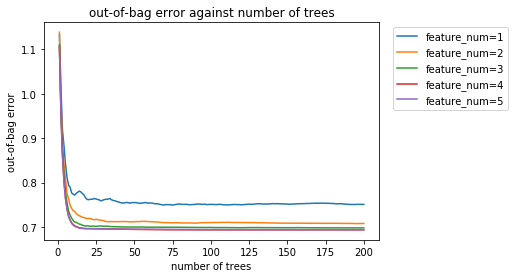

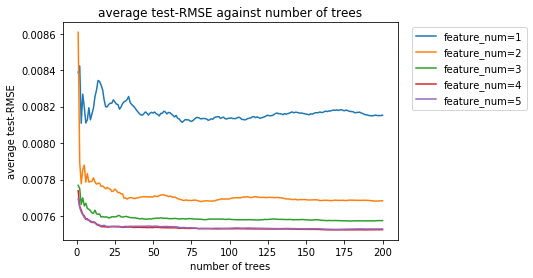

In [150]:
plt.figure()
plt.title('out-of-bag error against number of trees')
plt.xlabel('number of trees')
plt.ylabel('out-of-bag error')
plt.plot(range(1,201, 1), oob)
plt.legend(('feature_num=1','feature_num=2','feature_num=3','feature_num=4','feature_num=5' ),loc='upper right', bbox_to_anchor=(1.4, 1))


plt.figure()
plt.title('average test-RMSE against number of trees')
plt.xlabel('number of trees')
plt.ylabel('average test-RMSE')
plt.plot(range(1,201, 1), avg_RMSE[:,:,1])
plt.legend(('feature_num=1','feature_num=2','feature_num=3','feature_num=4','feature_num=5' ),loc='upper right', bbox_to_anchor=(1.4, 1))


# Neural Network